# K-means

Let's consider K-means algorithm:

**Input:**

- $K$ (number of clusters)
- Training set $\{x^{(1)}, x^{(2)},...,x^{(m)}\}$

**Algorithm:**

1) Randomly initialize *K* cluster centroids $\mu_1, \mu_2,..., \mu_K \in \mathbb{R}^n$

2) Repeat:
  - for $i$=1 to $m$ 

$\qquad c^{(i)} :=$ index (from 1 to $K$) of cluster centroid closest to $x^{(i)}$
  - for $k$=1 to $K$ 

$\qquad \mu_k :=$ average (mean) of points assigned to cluster $k$

**Optimization objective:**

Cost function:
$J(c^{(1)},...,c^{(m)},\mu_1,...,\mu_K) = \frac{1}{m}\sum_{i=1}^m ||x^{(i)}-\mu_{c{(i)}}||^2$

Minimize:

$\min_{c^{(1)},...,c^{(m)}, \mu_1,...,\mu_K}\: J(c^{(1)},...,c^{(m)},\mu_1,...,\mu_K)$

**Dataset:**

Dataset is generated with sklearn.datasets.make_blobs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns 
from sklearn.datasets import make_blobs

In [13]:
class KMeans:
  """
  KMeans model object assigns each training sample to a particular cluster.
  
  Parameters:
  -----------
    K : int
      Number of clusters to split the data
    num_init : int
      Number of random initialization of cluster centroids
    num_iter : int
      Number of iterations to move centroids and assign new clusters
  
  Methods:
  --------
    train(train_data)
      The main method of the class. Assign sample to different clusters.
      Also, it creates an instance attribute with the cost function score.
      
      Parameters:
      -----------
      train_data : DataFrame
        Dataframe with train data to split to different clusters.
  """
  def __init__(self, K=5, num_init=10, num_iter=10):
    self.K = K
    self.num_init = num_init
    self.num_iter = num_iter
  
  def train(self, train_data):
    def get_clusters(row, centroids):
      """Returns a cluster number for each sample and a distance to its centroid"""
      lst = [(cluster, sum((value - row) ** 2)) for cluster, value in enumerate(centroids, start=1)]
      return int(min(lst, key=lambda x: x[1])[0]), min(lst, key=lambda x: x[1])[1]

    def cost_function(train_data, centroids):
      """Returns the cost function value"""
      return sum(train_data['distance']) / len(train_data['distance'])

    cost_func_array = []
    for _ in range(self.num_init):
      random_clusters = random.sample(range(0, 200), self.K)
      centroids = train_data.loc[random_clusters, ['x', 'y']].to_numpy()
      for _ in range(self.num_iter):
        train_data[['cluster', 'distance']]  = train_data[['x', 'y']].apply(get_clusters, axis=1, args=(centroids,), result_type ='expand')
        centroids = train_data[['x', 'y', 'cluster']].groupby('cluster').mean().to_numpy()
      cost = cost_function(train_data, centroids)
      cost_func_array.append((cost, centroids))
    best_centroids = min(cost_func_array, key=lambda x: x[0])[1]
    train_data[['cluster', 'distance']]  = train_data[['x', 'y']].apply(get_clusters, axis=1, args=(best_centroids,), result_type ='expand')
    self.best_accuracy = cost_function(train_data, best_centroids)
    return train_data
    

In [49]:
def create_train_data(num_samp: int, num_clus: int):
  """Creates a training dataset with given number of clusters and samples"""
  X, y = make_blobs(n_samples=num_samp, centers=num_clus, n_features=2, center_box=(-15.0, 15.0))
  return pd.DataFrame(dict(x=X[:,0], y=X[:,1]))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


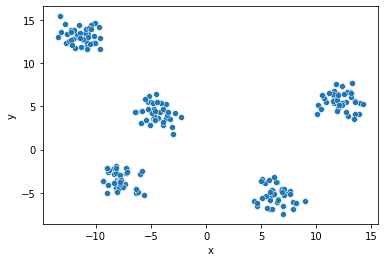

In [50]:
num_samples = 200
num_clusters = 5
train = create_train_data(num_samples, num_clusters)
sns.scatterplot(train['x'], train['y'])
plt.show()

In [51]:
model = KMeans()
train_data = model.train(train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


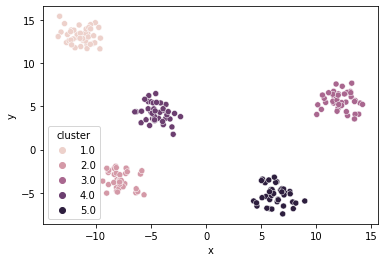

In [52]:
sns.scatterplot(train_data['x'], train_data['y'], hue=train_data['cluster'])
plt.show()

### Choosing number of clusters (elbow method)

In [ ]:
elbow_accuracies = []
for k in range(3, 8):
  print('Current k: ', k)
  model = KMeans(K=k)
  train_data = model.train(train)
  elbow_accuracies.append(model.best_accuracy)

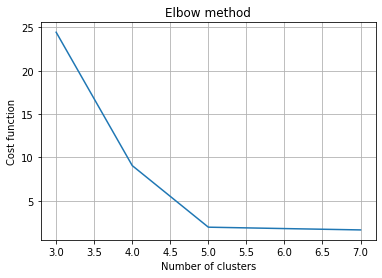

In [60]:
plt.plot(list(range(3, 8)), elbow_accuracies)
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.title('Elbow method')
plt.grid()